# model Grus grus

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

import os
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df_Grus_grus= pd.read_csv("df_Grus_grus")

In [6]:
df_Grus_grus.head()

,Unnamed: 0,eventDate,year,month,day,continent,Country,City,Specie
0,0,2010-09-10T10:00:00,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
1,1,2010-09-10T10:00:00,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
2,2,2010-09-10T10:00:00,2010,9,10,EUROPE,Estonia,Jõgeva,Grus grus
3,3,2010-09-11T10:00:00,2010,9,11,EUROPE,Estonia,Põlva,Grus grus
4,4,2010-09-11T10:00:00,2010,9,11,EUROPE,Estonia,Jõgeva,Grus grus


In [7]:
df_Grus_grus["eventDate"] = pd.to_datetime(df_ciconia_ciconia["eventDate"])

df_Grus_grus["eventDate"]= df_Grus_grus["eventDate"].dt.strftime('%Y/%m/%d')

In [8]:
df_Grus_grus.drop("Unnamed: 0", axis =1, inplace = True)

In [9]:
df_Grus_grus.set_index(df_Grus_grus["eventDate"], inplace=True)

In [10]:
# df_ciconia_ciconia.drop(["eventDate"], axis= 1, inplace = True)

In [11]:
df_Grus_grus

,eventDate,year,month,day,continent,Country,City,Specie
eventDate,,,,,,,,
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Jõgeva,Grus grus
2010/09/11,2010/09/11,2010,9,11,EUROPE,Estonia,Põlva,Grus grus
2010/09/11,2010/09/11,2010,9,11,EUROPE,Estonia,Jõgeva,Grus grus
...,...,...,...,...,...,...,...,...
2022/04/15,2022/04/15,2022,4,15,EUROPE,Estonia,Saare,Grus grus
2022/04/15,2022/04/15,2022,4,15,EUROPE,Russia,Pskov,Grus grus
2022/04/15,2022/04/15,2022,4,15,EUROPE,Estonia,Tartu,Grus grus


# SQL connector

In [12]:
import mysql.connector as sql    # intsall mysql-connector-python not sql-connector

In [13]:
hostname="localhost"
dbname="cdac_project"
uname="root"
pwd="manager"

In [14]:
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
				.format(host=hostname, db=dbname, user=uname, pw=pwd))

In [24]:
df_Grus_grus.to_sql(f'df_Grus_grus_24_12', engine, index=False)

In [16]:
# this we shifted below
mydb = sql.connect(
    host="localhost", user="root", password="manager", database="cdac_project"
)



In [17]:
def query(query):
    mycursor = mydb.cursor()
    sql = query
    mycursor.execute(sql)
    result = mycursor.fetchall()
    mycursor.close()

    return pd.DataFrame(result)

In [18]:
df_Grus_grus.head()

,eventDate,year,month,day,continent,Country,City,Specie
eventDate,,,,,,,,
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Põlva,Grus grus
2010/09/10,2010/09/10,2010,9,10,EUROPE,Estonia,Jõgeva,Grus grus
2010/09/11,2010/09/11,2010,9,11,EUROPE,Estonia,Põlva,Grus grus
2010/09/11,2010/09/11,2010,9,11,EUROPE,Estonia,Jõgeva,Grus grus


In [25]:
df_observation = query("SELECT COUNT(eventDate), eventDate as daily_spotting  FROM df_Grus_grus_24_12 GROUP BY daily_spotting ORDER BY eventDate")


In [26]:
df_observation.rename({0:"daily_frequency",1:"date",2:"country",3:"city",4:"continent"},axis = 1, inplace=True)

In [27]:
df_observation

,daily_frequency,date
0,3,2010/09/10
1,3,2010/09/11
2,3,2010/09/12
3,3,2010/09/13
4,3,2010/09/14
...,...,...
3573,96,2022/04/11
3574,95,2022/04/12
3575,92,2022/04/13
3576,88,2022/04/14


In [28]:
df_observation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3578 entries, 0 to 3577
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   daily_frequency  3578 non-null   int64 
 1   date             3578 non-null   object
dtypes: int64(1), object(1)
memory usage: 56.0+ KB


In [29]:
pd.to_datetime(df_observation["date"])

0      2010-09-10
1      2010-09-11
2      2010-09-12
3      2010-09-13
4      2010-09-14
          ...    
3573   2022-04-11
3574   2022-04-12
3575   2022-04-13
3576   2022-04-14
3577   2022-04-15
Name: date, Length: 3578, dtype: datetime64[ns]

In [30]:
df_observation

,daily_frequency,date
0,3,2010/09/10
1,3,2010/09/11
2,3,2010/09/12
3,3,2010/09/13
4,3,2010/09/14
...,...,...
3573,96,2022/04/11
3574,95,2022/04/12
3575,92,2022/04/13
3576,88,2022/04/14


In [31]:
df_demo = df_observation.copy()

In [32]:
df_demo.set_index("date", inplace=True)

In [33]:
# df_demo.drop("date", axis =1, inplace = True)
df_demo.isna().sum()

daily_frequency    0
dtype: int64

In [34]:
df_demo.isna().sum()

daily_frequency    0
dtype: int64

In [35]:
# del df_demo["country"],df_demo["city"],df_demo["continent"]

In [36]:
df_demo.index.freq = "D"

In [37]:
df_demo

,daily_frequency
date,
2010/09/10,3
2010/09/11,3
2010/09/12,3
2010/09/13,3
2010/09/14,3
...,...
2022/04/11,96
2022/04/12,95
2022/04/13,92


In [38]:
size = int(len(df_demo)*0.8)

df_train = df_demo.iloc[:size]
df_test  = df_demo.iloc[size:]

In [39]:
df_train.tail()

,daily_frequency
date,
2020/03/14,387
2020/03/15,399
2020/03/16,375
2020/03/17,330
2020/03/18,385


In [40]:
df_test.head()

,daily_frequency
date,
2020/03/19,366
2020/03/20,343
2020/03/21,343
2020/03/22,360
2020/03/23,369


<Axes: xlabel='date'>

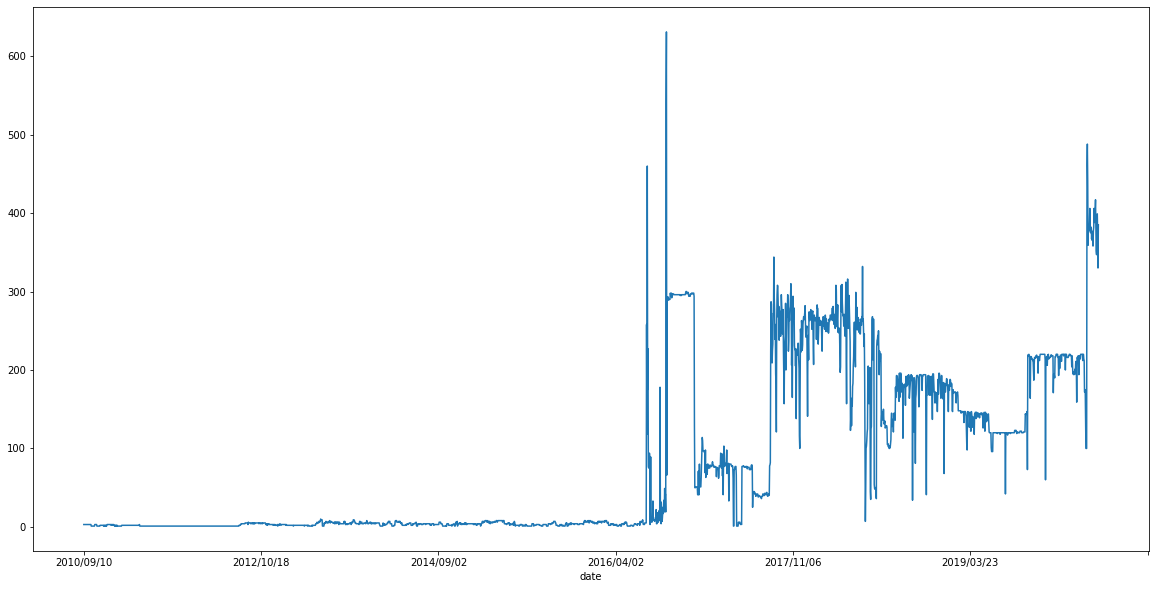

In [42]:
plt.figure(figsize=(20,10))
df_train.daily_frequency.plot()

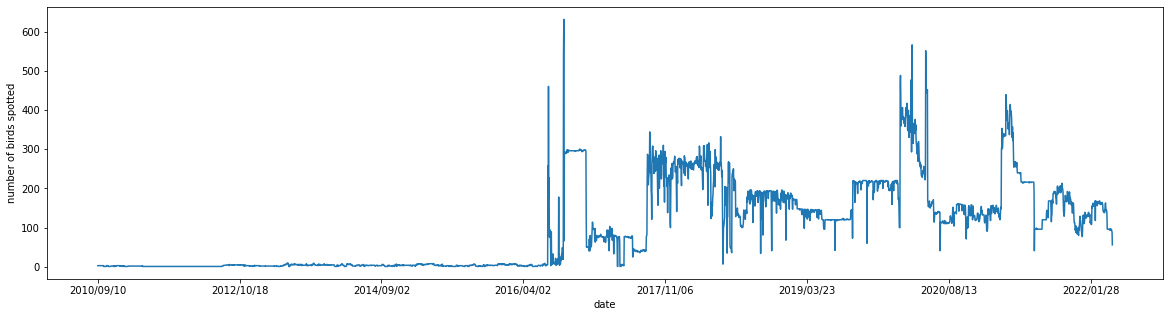

In [43]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('number of birds spotted')
df_demo["daily_frequency"].plot()
# plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


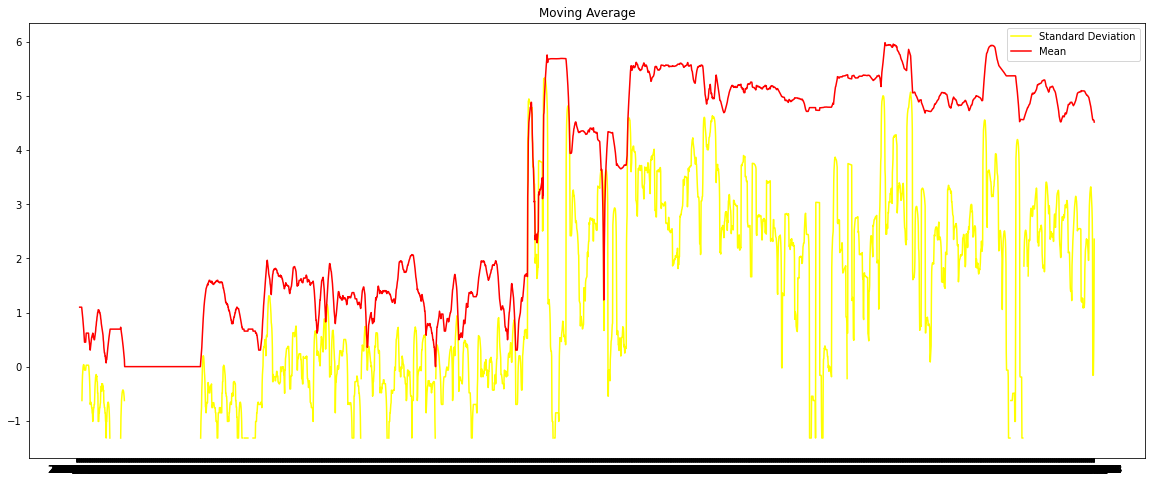

In [46]:
from pylab import rcParams

rcParams["figure.figsize"] = 20,8
moving_avg = np.log(df_demo.rolling(14).mean())
moving_std = np.log(df_demo.rolling(14).std())

plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(moving_std, color ="yellow", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

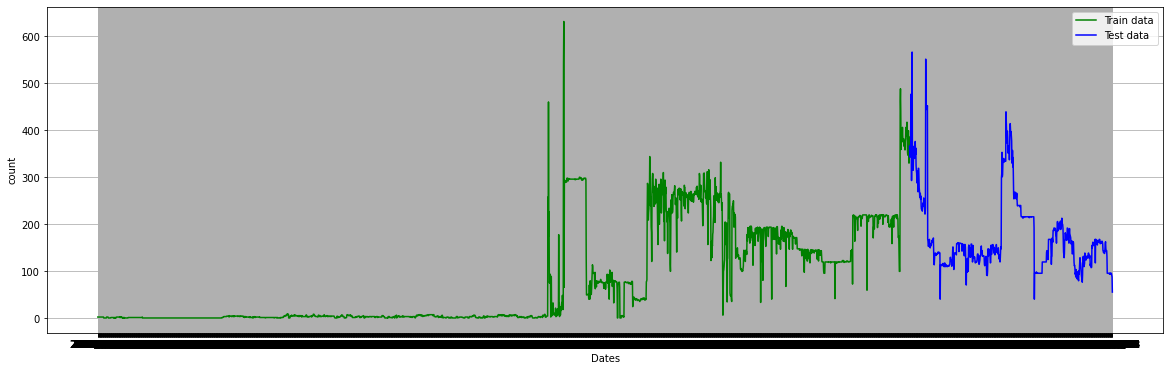

In [45]:
plt.figure(figsize=(20,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('count')
plt.plot(df_train, 'green', label='Train data')
plt.plot(df_test , 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=36039.460, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=26895.775, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=32975.217, Time=0.14 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=26730.553, Time=0.06 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=26554.568, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=26642.524, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=26555.009, Time=0.51 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=26554.615, Time=0.67 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=26575.625, Time=0.35 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=26557.695, Time=0.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=26553.442, Time=0.57 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=26637.777, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=26721.458, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] i

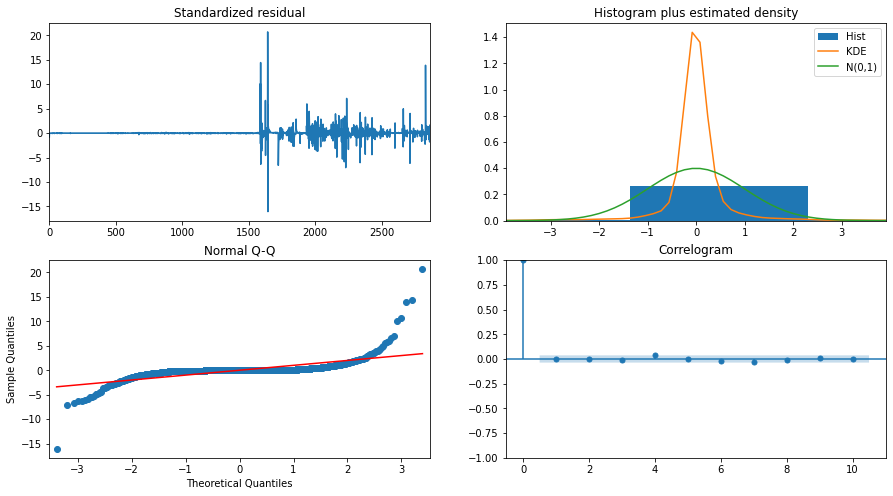

In [47]:
model_autoARIMA = auto_arima(df_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [49]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df_train,order=(2,0,3))
fitted = model.fit()
print(fitted.summary())

/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        daily_frequency   No. Observations:                 2862
Model:                 ARIMA(2, 0, 3)   Log Likelihood              -13268.987
Date:                Sun, 24 Dec 2023   AIC                          26551.975
Time:                        15:47:29   BIC                          26593.689
Sample:                             0   HQIC                         26567.015
                               - 2862                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.0415    103.216      0.775      0.438    -122.259     282.342
ar.L1          1.7277      0.057     30.561      0.000       1.617       1.839
ar.L2         -0.7286      0.056    -12.978      0.0

/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
return_value = fitted.forecast(len(df_test),alpha = 0.05)

/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/sunbeam/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [51]:
return_value

2862    376.528348
2863    371.563570
2864    370.151036
2865    368.875703
2866    367.701414
           ...    
3573    110.804134
3574    110.707128
3575    110.610428
3576    110.514033
3577    110.417941
Name: predicted_mean, Length: 716, dtype: float64

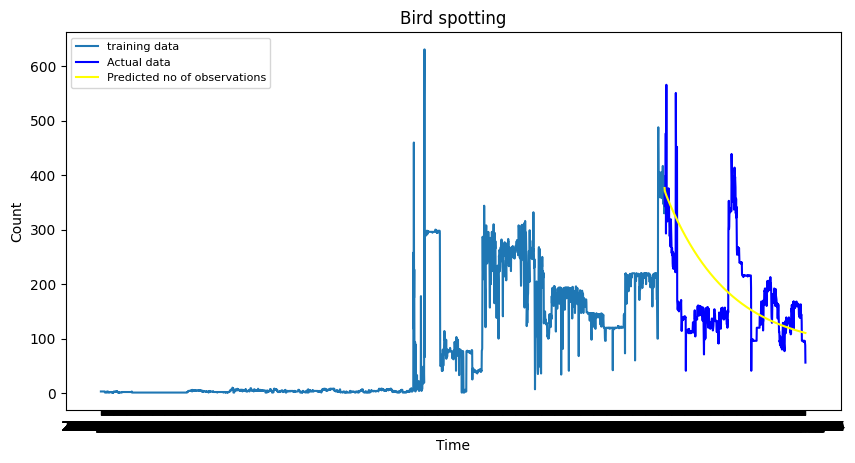

In [52]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(df_train, label='training data')
plt.plot(df_test, color = 'blue', label='Actual data')
plt.plot(return_value, color = 'yellow',label='Predicted no of observations')
plt.title('Bird spotting')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend(loc='upper left', fontsize=8)
plt.show()